# Electricity vs Gas

## preleminaries

I imported the smarthome dataset with:

`python3 smartthings.py -d 'sqlite:///db/pythondqlite.db'  'data/smartthings/smartthings.*'`

Also the p1e data set is required with:

`python3 p1e.py -r`


## Overview
This report focuses on the electricity vs gas consumption. Main questions we will be adressing: 

* What is the distribution of the energy and gas usage over a day?
* Are there weekly patterns in the energy and gas usage?

First energy and gas will be explored generally to get a feel for the data. Afterwards we will focus more on the exact consumption per interval.

## Par.1 Electricity

### Overview of the data
For start there will be a quick look at the electricity data to get an overal idea. In the following plot we examine the total electricity consumption per month. We see there is a high tariff and a low tariff. Also the data is cummulative. There seems to be a dip around March. It could be that around March there is nobody home.

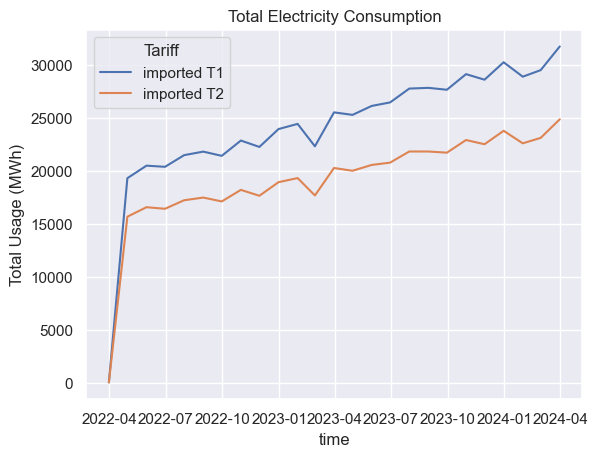

In [1]:
from report_electricity_usage import ReportElcUsage
report = ReportElcUsage()
report.figure1()

### Looking at 2023
The dip in 2023 is interesting. Lets see in the context of one year how different the consumption per month is. The data is plotted in a high tarif bar and a low tarif bar per month. 

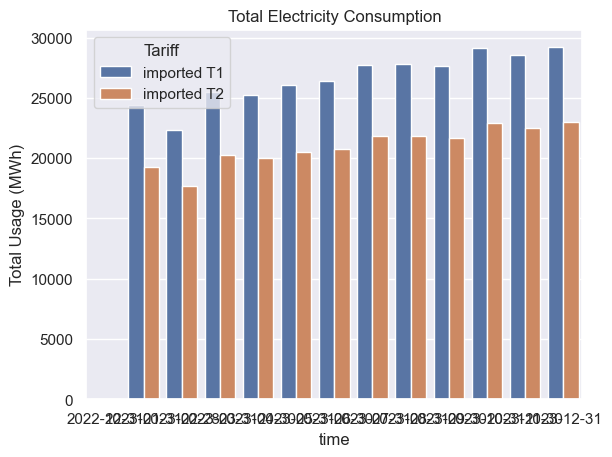

In [1]:
from report_electricity_usage import ReportElcUsage
report = ReportElcUsage()
report.figure2()

### Table of March
March seems to form an exception in our dataset. Let's see what's going on. The data is queried only for the month March and resampled on it's usage per day. First we look at the table to get a more detailed information. What we see is that the electricity usage is very low. This could mean that people are gone and that electricity is only used by appliances that are left on.

In [9]:
t1 = MyDB.read_model_df(Pe1T1, between(Pe1T1.time, create_timestamp(2023, 3, 1), create_timestamp(2023, 3, 31)))
t2 = MyDB.read_model_df(Pe1T2, between(Pe1T2.time, create_timestamp(2023, 3, 1), create_timestamp(2023, 3, 31)))

# Set the timestamp index
t1 = df_timestamp_index(t1)
t2 = df_timestamp_index(t2)

df = pd.concat([t1,t2]).fillna(0)

# Resample on month
df = df.resample('D').sum()

df.head(30)

,imported T1,exported T1,imported T2,exported T2
time,,,,
2023-02-28,33941.137,0.0,26911.772,0.0
2023-03-01,814716.477,0.0,646281.464,0.0
2023-03-02,815002.210,0.0,647180.982,0.0
2023-03-03,815229.521,0.0,647881.400,0.0
2023-03-04,815806.806,0.0,648326.304,0.0
2023-03-05,817356.389,0.0,648326.304,0.0
2023-03-06,818138.016,0.0,648593.688,0.0
2023-03-07,818410.883,0.0,649300.405,0.0
2023-03-08,818699.135,0.0,650104.831,0.0


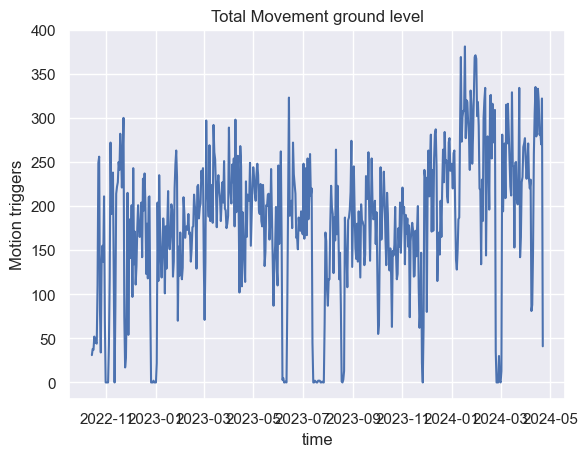

In [29]:
from models import SmartThingsGround
from home_messages_db import HomeMessagesDB
from functions import df_timestamp_index
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import and_

MyDB = HomeMessagesDB('sqlite:///db/pythondqlite.db')

df = MyDB.read_model_df(SmartThingsGround,  SmartThingsGround.attribute == "motion")
df = df_timestamp_index(df)
df = df[[ 'value']]

with pd.option_context("future.no_silent_downcasting", True):
    df = df.replace(to_replace='active', value=1)
    df = df.replace(to_replace='inactive', value=0)

df = df.resample('D').sum()

sns.set_theme(style="darkgrid")
# convert to wide format

sns.lineplot(x='time',y='value', data=df)
plt.ylabel('Motion triggers')
plt.title('Total Movement ground level')
plt.show()                            